In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud

import numpy.linalg as lg
from numpy.linalg import norm
import seaborn as sns
import string
import os
import re

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from __future__ import absolute_import, division, print_function, unicode_literals


In [11]:
def Kmeans(x, k, iterations=3):
  indices = np.arange(X.shape[0])
  sample_indices = np.random.choice(indices, size=k, replace=False)
  means=X[sample_indices]

  for i in range(iterations):
    #this classifies based on distance
    dist = Distance(X, means)
    y_hat= np.argmin(dist, axis=1)

    #this step recalculates the means
    means = []
    for i in range(k):
      mean = np.mean(X[y_hat==i], axis=0)
      means.append(mean)
    means = np.vstack(means)
    
  dist = Distance(X, means)
  y_hat=np.argmin(dist, axis=1)

  return(y_hat, means)

In [12]:
def Responsability(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [13]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embedder = hub.load(module_url)

In [14]:
def TextPreProcessing(sentence):
  text = sentence.lower().strip()
  text_p = "".join(char for char in text if char not in string.punctuation)
  clean_sentence = text_dn = re.sub(r'https?:\/\/.*[\r\n]*','',text_p)
  return clean_sentence

In [15]:
def embed(sentence):
  sentence_in = [sentence]
  return embedder(sentence_in)

In [16]:
def data_load(filename):
  data = pd.read_csv(filename, header=0, encoding='iso-8859-1')
  X = data.Tweet
  return X

In [17]:
def LoadVectors(X):
  Dict_of_Sentences = dict()
  for i in range(len(X)):
    Dict_of_Sentences[i] = {'sentence': X[i], 'vector': embed(TextPreProcessing(X[i]))}
  return Dict_of_Sentences

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/K-Means/main/HappySad%20K-Means%20Clustering.csv')
data

,Label,Encoding,string
0,sad,NaN,*screams in 25 different languages*
1,sad,NaN,Families to sue over Legionnaires: More than 4...
2,sad,NaN,Pandemonium In Aba As Woman Delivers Baby With...
3,sad,NaN,My emotions are a train wreck. My body is a tr...
4,happy,NaN,Alton brown just did a livestream and he burne...
...,...,...,...
1859,happy,NaN,@Trollkrattos Juan Carlos Salvador The Secret ...
1860,happy,NaN,@devon_breneman hopefully it doesn't electrocu...
1861,sad,NaN,Businesses are deluged with invokces. Make you...
1862,sad,NaN,#BREAKING411 4 police officers arrested for ab...


In [19]:
data['Encoding'] = data['Label'].apply(lambda x:1 if x == 'happy' else 0)

In [20]:
data['Encoding'].value_counts()

0    1110
1     754
Name: Encoding, dtype: int64

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
X = list(data['string'].values)
X[:5]

['*screams in 25 different languages*',
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB",
 'Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qshhnb',
 "My emotions are a train wreck. My body is a train wreck. I'm a wreck",
 'Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke http://t.co/gvd7fcx8iZ']

In [23]:
text_dn = [re.sub(r'https?:\/\/.*[\r\n]*','',tweets) for tweets in X]
text_dn[:5]


['*screams in 25 different languages*',
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... ",
 'Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - ',
 "My emotions are a train wreck. My body is a train wreck. I'm a wreck",
 'Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke ']

In [24]:
text_l = [item.lower() for item in text_dn]
text_l[:5]

['*screams in 25 different languages*',
 "families to sue over legionnaires: more than 40 families affected by the fatal outbreak of legionnaires' disea... ",
 'pandemonium in aba as woman delivers baby without face (photos) - ',
 "my emotions are a train wreck. my body is a train wreck. i'm a wreck",
 'alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke ']

In [25]:
text_p = []

for i in range(len(text_l)):
  tp = "".join([char for char in text_l[i].lower() if char not in string.punctuation])
  text_p.append(tp)
text_p[:5]

['screams in 25 different languages',
 'families to sue over legionnaires more than 40 families affected by the fatal outbreak of legionnaires disea ',
 'pandemonium in aba as woman delivers baby without face photos  ',
 'my emotions are a train wreck my body is a train wreck im a wreck',
 'alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke ']

In [26]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [27]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
words = []

for i in range(len(text_p)):
  w = word_tokenize(text_p[i])
  words.append(w)
print(words)


[['screams', 'in', '25', 'different', 'languages'], ['families', 'to', 'sue', 'over', 'legionnaires', 'more', 'than', '40', 'families', 'affected', 'by', 'the', 'fatal', 'outbreak', 'of', 'legionnaires', 'disea'], ['pandemonium', 'in', 'aba', 'as', 'woman', 'delivers', 'baby', 'without', 'face', 'photos'], ['my', 'emotions', 'are', 'a', 'train', 'wreck', 'my', 'body', 'is', 'a', 'train', 'wreck', 'im', 'a', 'wreck'], ['alton', 'brown', 'just', 'did', 'a', 'livestream', 'and', 'he', 'burned', 'the', 'butter', 'and', 'touched', 'the', 'hot', 'plate', 'too', 'soon', 'and', 'made', 'a', 'nut', 'joke'], ['tinyjecht', 'are', 'you', 'another', 'standuser', 'if', 'you', 'are', 'i', 'will', 'have', 'to', 'detonate', 'you', 'with', 'my', 'killer', 'queen'], ['brooke', 'just', 'face', 'timed', 'me', 'at', 'the', 'concert', 'and', 'just', 'screamed', 'for', '2', 'minutes', 'straight'], ['a', 'group', 'of', 'florida', 'forest', 'service', 'firefighters', 'could', 'be', 'deployed', 'to', 'california

In [29]:
filtered_words = []

for i in range(len(words)):
  fw = [word for word in words[i] if word not in stop_words]
  filtered_words.append(fw)
print(filtered_words)


[['screams', '25', 'different', 'languages'], ['families', 'sue', 'legionnaires', '40', 'families', 'affected', 'fatal', 'outbreak', 'legionnaires', 'disea'], ['pandemonium', 'aba', 'woman', 'delivers', 'baby', 'without', 'face', 'photos'], ['emotions', 'train', 'wreck', 'body', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burned', 'butter', 'touched', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'another', 'standuser', 'detonate', 'killer', 'queen'], ['brooke', 'face', 'timed', 'concert', 'screamed', '2', 'minutes', 'straight'], ['group', 'florida', 'forest', 'service', 'firefighters', 'could', 'deployed', 'california', 'help', 'contain', 'fires', 'details', '10'], ['70', 'years', 'atomic', 'bombs', 'japan', 'still', 'struggles', 'war', 'past', 'anniversary', 'devastation', 'wrought', 'b'], ['majority', 'killed', 'civilians', 'ground', 'jet', 'first', 'bombed', 'citys', 'main', 'street', 'dramatically', 'plummeted'], ['idm', 'burn', 'whole', 'go

In [30]:
lemmatizer = WordNetLemmatizer()
lemmatized = []

for i in range(len(filtered_words)):
  l = [lemmatizer.lemmatize(word) for word in filtered_words[i]]
  lemmatized.append(l)
print(lemmatized)

[['scream', '25', 'different', 'language'], ['family', 'sue', 'legionnaire', '40', 'family', 'affected', 'fatal', 'outbreak', 'legionnaire', 'disea'], ['pandemonium', 'aba', 'woman', 'delivers', 'baby', 'without', 'face', 'photo'], ['emotion', 'train', 'wreck', 'body', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burned', 'butter', 'touched', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'another', 'standuser', 'detonate', 'killer', 'queen'], ['brooke', 'face', 'timed', 'concert', 'screamed', '2', 'minute', 'straight'], ['group', 'florida', 'forest', 'service', 'firefighter', 'could', 'deployed', 'california', 'help', 'contain', 'fire', 'detail', '10'], ['70', 'year', 'atomic', 'bomb', 'japan', 'still', 'struggle', 'war', 'past', 'anniversary', 'devastation', 'wrought', 'b'], ['majority', 'killed', 'civilian', 'ground', 'jet', 'first', 'bombed', 'city', 'main', 'street', 'dramatically', 'plummeted'], ['idm', 'burn', 'whole', 'gotham', 'city', 'bcs

In [31]:
#  remove remaining tokens that are not alphabetic
tokens = []

for i in range(len(lemmatized)):
  t = [word for word in lemmatized[i] if word.isalpha()]
  tokens.append(t)

print(tokens)


[['scream', 'different', 'language'], ['family', 'sue', 'legionnaire', 'family', 'affected', 'fatal', 'outbreak', 'legionnaire', 'disea'], ['pandemonium', 'aba', 'woman', 'delivers', 'baby', 'without', 'face', 'photo'], ['emotion', 'train', 'wreck', 'body', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burned', 'butter', 'touched', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'another', 'standuser', 'detonate', 'killer', 'queen'], ['brooke', 'face', 'timed', 'concert', 'screamed', 'minute', 'straight'], ['group', 'florida', 'forest', 'service', 'firefighter', 'could', 'deployed', 'california', 'help', 'contain', 'fire', 'detail'], ['year', 'atomic', 'bomb', 'japan', 'still', 'struggle', 'war', 'past', 'anniversary', 'devastation', 'wrought', 'b'], ['majority', 'killed', 'civilian', 'ground', 'jet', 'first', 'bombed', 'city', 'main', 'street', 'dramatically', 'plummeted'], ['idm', 'burn', 'whole', 'gotham', 'city', 'bcs', 'im', 'gon', 'na', 'laugh'

In [32]:
# filter out short tokens
shr = []
for i in range(len(tokens)):
  s = [word for word in tokens[i] if len(word) > 3]
  shr.append(s)

short = []
for i in range(len(shr)):
  s = " ".join(shr[i])
  short.append(s)

short[:5]

['scream different language',
 'family legionnaire family affected fatal outbreak legionnaire disea',
 'pandemonium woman delivers baby without face photo',
 'emotion train wreck body train wreck wreck',
 'alton brown livestream burned butter touched plate soon made joke']

In [33]:
porter = PorterStemmer()
stemmed = []

for i in range(len(filtered_words)):
  s = [porter.stem(word)for word in filtered_words[i]]
  stemmed.append(s)
print(stemmed)
print(len(stemmed))

[['scream', '25', 'differ', 'languag'], ['famili', 'sue', 'legionnair', '40', 'famili', 'affect', 'fatal', 'outbreak', 'legionnair', 'disea'], ['pandemonium', 'aba', 'woman', 'deliv', 'babi', 'without', 'face', 'photo'], ['emot', 'train', 'wreck', 'bodi', 'train', 'wreck', 'im', 'wreck'], ['alton', 'brown', 'livestream', 'burn', 'butter', 'touch', 'hot', 'plate', 'soon', 'made', 'nut', 'joke'], ['tinyjecht', 'anoth', 'standus', 'deton', 'killer', 'queen'], ['brook', 'face', 'time', 'concert', 'scream', '2', 'minut', 'straight'], ['group', 'florida', 'forest', 'servic', 'firefight', 'could', 'deploy', 'california', 'help', 'contain', 'fire', 'detail', '10'], ['70', 'year', 'atom', 'bomb', 'japan', 'still', 'struggl', 'war', 'past', 'anniversari', 'devast', 'wrought', 'b'], ['major', 'kill', 'civilian', 'ground', 'jet', 'first', 'bomb', 'citi', 'main', 'street', 'dramat', 'plummet'], ['idm', 'burn', 'whole', 'gotham', 'citi', 'bc', 'im', 'gon', 'na', 'laugh', 'everyon', 'theyr', 'panick'

##New Data

In [34]:
data['cleaned'] = short
data

,Label,Encoding,string,cleaned
0,sad,0,*screams in 25 different languages*,scream different language
1,sad,0,Families to sue over Legionnaires: More than 4...,family legionnaire family affected fatal outbr...
2,sad,0,Pandemonium In Aba As Woman Delivers Baby With...,pandemonium woman delivers baby without face p...
3,sad,0,My emotions are a train wreck. My body is a tr...,emotion train wreck body train wreck wreck
4,happy,1,Alton brown just did a livestream and he burne...,alton brown livestream burned butter touched p...
...,...,...,...,...
1859,happy,1,@Trollkrattos Juan Carlos Salvador The Secret ...,trollkrattos juan carlos salvador secret riot ...
1860,happy,1,@devon_breneman hopefully it doesn't electrocu...,devonbreneman hopefully doesnt electrocute hea...
1861,sad,0,Businesses are deluged with invokces. Make you...,business deluged invokces make stand colour sh...
1862,sad,0,#BREAKING411 4 police officers arrested for ab...,police officer arrested abusing child policeru...


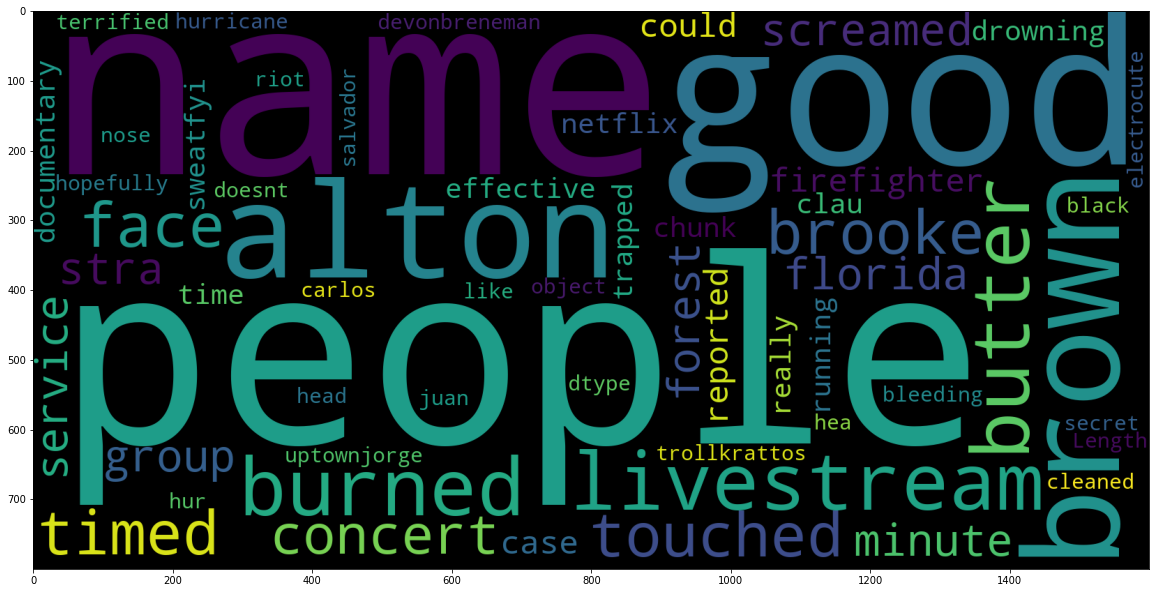

In [35]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(data[data['Encoding']==1].cleaned))
plt.imshow(wc)

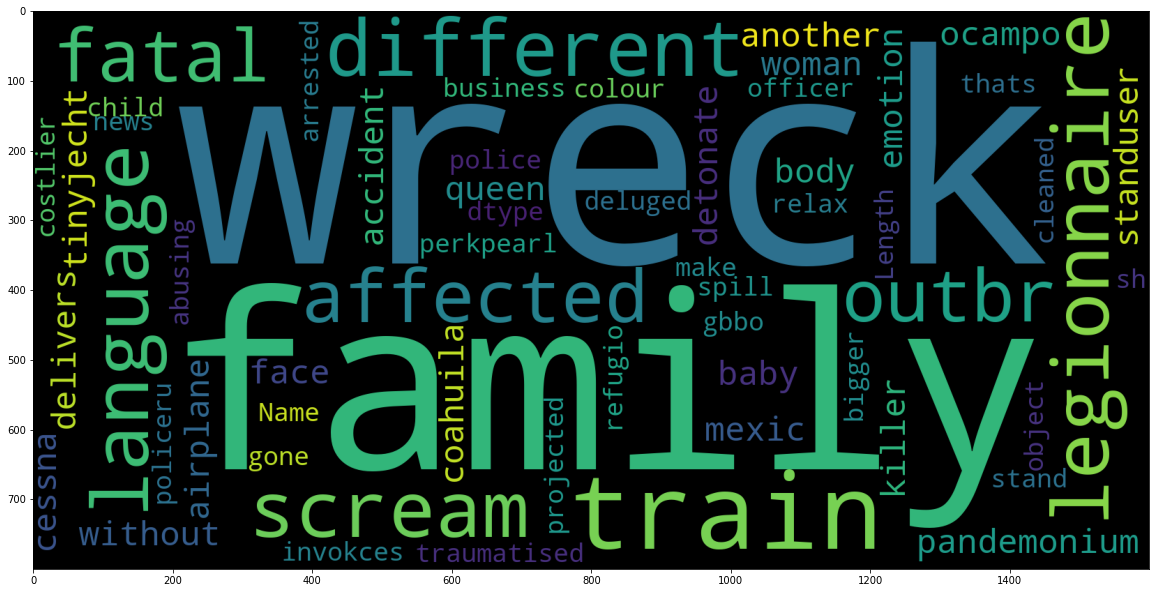

In [36]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(data[data['Encoding']==0].cleaned))
plt.imshow(wc)

In [37]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [38]:
X_Train_new = train[['Encoding', 'cleaned']]
X_Train_new

,Encoding,cleaned
1006,0,next financial crash writing
1349,0,charged manslaughter shooting death elijah walker
1277,0,horrible sinking feeling home phone realise wh...
749,0,even week fucking accident cant fucking drive
1270,1,crazy enough degree midday heat blazing place
...,...,...
94,1,edited shot syncopated style mimicking work su...
1279,1,christycroley work vela short blaze
956,0,arson suspect linked fire caught northern cali...
895,1,wait tell college friend reafs bloody mary drama


In [39]:
X_Test_new = test[['Encoding', 'cleaned']]
X_Test_new

,Encoding,cleaned
251,1,currensy really talkin talk devastated ghostwr...
487,0,georgia sinkhole close road swallow whole pond
1438,0,prepare selects regional special pathogen trea...
401,1,thoughtful provocative insistently humanizing ...
1195,0,news flash decent billers promoted manager kno...
...,...,...
1413,0,hope batista bombed lauren
719,1,must seen believed
1610,1,george njenga hero saved burning friend razing...
1622,1,blown away extension nothing seen many option


In [40]:
X_Validate_new = validate[['Encoding', 'cleaned']]
X_Validate_new

,Encoding,cleaned
1111,1,last chance animal rescue post
1635,0,himeruisu going hard shove face pillow muffle ...
392,0,since chemicalweapons line warning august conf...
1572,0,anniversary nears atomic bomb survivor speak n...
1114,1,thought drought ashj
...,...,...
1721,1,reddit quarantine offensive content
1753,1,evening article
1504,0,sweeping putting people body
638,0,went school bombed east family house bathroom ...


## Sentiment Analysis using TF and KERAS

---



In [41]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [42]:
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable = True)

In [43]:
X_train = X_Train_new['cleaned'].astype('string')
X_train = tf.constant(X_train)
X_train

<tf.Tensor: shape=(1118,), dtype=string, numpy=
array([b'next financial crash writing',
       b'charged manslaughter shooting death elijah walker',
       b'horrible sinking feeling home phone realise whole time', ...,
       b'arson suspect linked fire caught northern california',
       b'wait tell college friend reafs bloody mary drama',
       b'lightning strike distance rpics'], dtype=object)>

In [44]:
hub_layer(X_train[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[-0.41536477, -0.6709719 ,  1.1759913 ,  0.46842465,  1.2671831 ,
        -1.032049  , -0.4086378 , -0.5549868 ,  0.09274948, -0.83199894,
        -1.1853428 , -0.22124082, -0.306246  ,  0.2678126 , -0.5789979 ,
         0.70528865,  0.59215003, -0.9440664 , -0.03740309, -0.19945359],
       [-0.9336921 , -0.89664954, -1.5499948 ,  1.1840528 ,  2.673876  ,
        -1.1467313 ,  0.0367097 ,  0.5995551 ,  2.0484164 ,  0.58792096,
        -0.6512503 , -0.87833   ,  0.3635173 ,  0.17860813, -0.84452903,
         2.2587893 , -2.2079272 , -0.39177653, -1.3347337 , -0.43718562],
       [ 1.1963228 , -0.84508175,  1.130765  , -0.04800061, -1.4426078 ,
        -2.2137628 , -1.2452221 ,  1.09965   ,  1.2012975 , -0.20452158,
        -1.7430903 ,  1.3148499 ,  0.31967917,  0.04340601, -1.9502203 ,
         1.4864616 ,  1.5278713 , -0.93368703, -1.3229699 , -0.34677336]],
      dtype=float32)>

In [45]:
y_train = tf.constant(X_Train_new['Encoding'])
y_train

<tf.Tensor: shape=(1118,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 1, 1])>

In [46]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#train_data = X_train, y_train

In [47]:
train_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [48]:
X_Validate = X_Validate_new['cleaned'].astype('string')
X_Validate = tf.constant(X_Validate)
X_Validate

<tf.Tensor: shape=(373,), dtype=string, numpy=
array([b'last chance animal rescue post',
       b'himeruisu going hard shove face pillow muffle scream pain pleasure',
       b'since chemicalweapons line warning august confirmed least people killed syria',
       b'anniversary nears atomic bomb survivor speak nuclear power',
       b'thought drought ashj', b'wait',
       b'realized dude onlyftf blew tusky game robsimss cantmisskid',
       b'rest summer usually worry forest fire calgary hour away',
       b'rollercoaster ride movie',
       b'think america would enough plucky british eccentric heart gold',
       b'eating twister drinking dunking twister would well weird',
       b'unlike teen flick swimming take time tell story cast mostly littleknown performer role introduces intriguing ambiguity',
       b'winter desolation death also tumblr',
       b'romantic dramatic never panic original sensei write rhyme attic',
       b'swiss kosher hotel bridge collapse injures five people',


In [49]:
y_validate = tf.constant(tf.constant(X_Validate_new['Encoding']))
y_validate

<tf.Tensor: shape=(373,), dtype=int64, numpy=
array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
     

In [50]:
validation_data = tf.data.Dataset.from_tensor_slices((X_Validate, y_validate))
#validation_data = X_Validate, y_validate
validation_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Building a Model in Keras

In [51]:
model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
history = model.fit(train_data.shuffle(1118).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 111ms/step - loss: 0.7033 - accuracy: 0.5716 - val_loss: 0.7016 - val_accuracy: 0.5764
Epoch 2/20
3/3 [==============================] - 0s 23ms/step - loss: 0.6858 - accuracy: 0.5886 - val_loss: 0.6898 - val_accuracy: 0.5898
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.6701 - accuracy: 0.6127 - val_loss: 0.6792 - val_accuracy: 0.6166
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 0.6559 - accuracy: 0.6225 - val_loss: 0.6689 - val_accuracy: 0.6247
Epoch 5/20
3/3 [==============================] - 0s 21ms/step - loss: 0.6426 - accuracy: 0.6386 - val_loss: 0.6593 - val_accuracy: 0.6488
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6299 - accuracy: 0.6521 - val_loss: 0.6505 - val_accuracy: 0.6649
Epoch 7/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6179 - accuracy: 0.6610 - val_loss: 0.6426 - val_accuracy: 0.6783
Epoch 8/20
3/3 [=====================

In [55]:
X_test = X_Test_new['cleaned'].astype('string')
X_test = tf.constant(X_test)
X_test

<tf.Tensor: shape=(373,), dtype=string, numpy=
array([b'currensy really talkin talk devastated ghostwriter anybody else',
       b'georgia sinkhole close road swallow whole pond',
       b'prepare selects regional special pathogen treatment center bioterrorism infectious ebola',
       b'thoughtful provocative insistently humanizing film',
       b'news flash decent billers promoted manager know want watch billing fall cliff humble',
       b'kirkmin listening demolish barthubbuch weei cant wait bait patriot hater coworkers brady discussion',
       b'monkey abused notorious laboratory dealer peta eyewitness invest',
       b'maybe past year seen release worst film comedy decade honestly analyze really',
       b'owner chicagoarea admits arson scheme',
       b'sure purdies alive blight',
       b'freebesieged yougov tory landslide cant possibly mean waferthin majority',
       b'rotating storm report huge massive violent tornado would',
       b'myanmar president urged people leave lo

In [56]:
y_test = tf.constant(X_Test_new['Encoding'])
y_test

<tf.Tensor: shape=(373,), dtype=int64, numpy=
array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
     

In [57]:
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [58]:
results = model.evaluate(test_data.batch(512), verbose=2)

1/1 - 0s - loss: 0.5693 - accuracy: 0.7346 - 17ms/epoch - 17ms/step


In [59]:
#(model.predict([input(str('Write a sentence: '))])>0.5).astype('int32')

In [62]:
X = model.predict([input(str('Write a sentence: '))])
#X = X.astype(float)
ans = ""
if X >= 0.5:
  print("array = 1 (Happy!), confidence: ", int(100 * (X)), "%")

elif X < 0.5:
  print("array = 0 (Sad!), confidence: ", int(100 * (1 - X)), "%")



Write a sentence: love
array = 1 (Happy!), confidence:  77 %
